In [1]:
# Fake News Detection using Machine Learning


In [2]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [10]:
#STEP 2: Laod the dataset
true_df = pd.read_csv(r"C:\Users\Nikhil\Desktop\MLP Project\True.csv")
fake_df = pd.read_csv(r"C:\Users\Nikhil\Desktop\MLP Project\Fake.csv")

In [11]:
# STEP 3: Add Labels
true_df['label'] = 1
fake_df['label'] = 0


In [12]:
# STEP 4: Combine Datasets
df = pd.concat([true_df[['title', 'text', 'label']], fake_df[['title', 'text', 'label']]])
df = df.sample(frac=1).reset_index(drop=True)
df['content'] = df['title'] + " " + df['text']
df = df[['content', 'label']]

In [13]:
# STEP 5: Clean the Text
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\n', '', text)
    return text

df['clean_content'] = df['content'].apply(clean_text)

In [14]:
# STEP 6: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['clean_content'])
y = df['label']

In [15]:
# STEP 7: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# STEP 8: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9948775055679288
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4690
           1       1.00      0.99      0.99      4290

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [30]:
# STEP 9: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.9916481069042317
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4690
           1       0.99      0.99      0.99      4290

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [24]:
# STEP 10: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
# For regression, use continuous label (just for demonstration, not practical here)
y_train_reg = y_train.astype(float)
y_test_reg = y_test.astype(float)


In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train_reg)
y_pred_lr = lr.predict(X_test)


In [27]:
print("\nLinear Regression R^2 Score:", r2_score(y_test_reg, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_lr))



Linear Regression R^2 Score: 0.7778262326431957
Mean Squared Error: 0.0554332371441069


In [28]:
# STEP 11: Summary Comparison Plot
models = ['Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

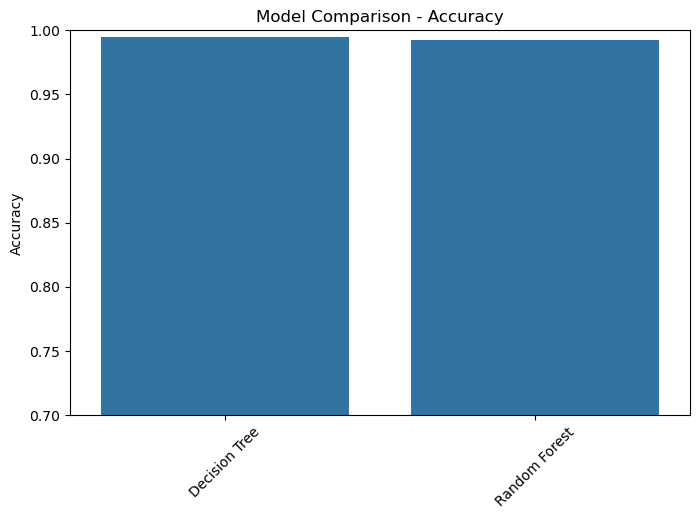

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()
